# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


df = pd.read_csv(r"C:\Users\felip\OneDrive\Ebac\Arvore de decisão\Pratica 1\base_final_dummy.csv")


df.columns

Index(['qtd_filhos', 'educacao', 'idade', 'tempo_emprego', 'possui_celular',
       'possui_fone_comercial', 'possui_fone', 'possui_email',
       'qt_pessoas_residencia', 'mau', 'sexo_M', 'posse_de_veiculo_Y',
       'posse_de_imovel_Y'],
      dtype='object')

In [50]:
#Separando as variaveis
y = df.mau
X = df.drop('mau',axis=1)

#Arvore de decisão em branco:
clf = DecisionTreeClassifier(random_state=100)


In [51]:
#Separando treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)


y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9837237237237237

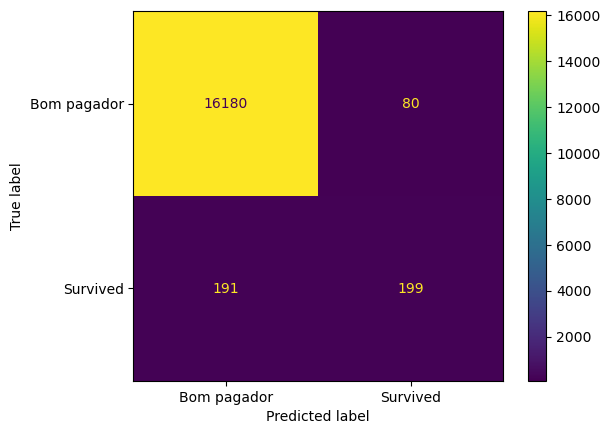

In [53]:
preditos = clf.predict(X)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bom pagador', 'Survived'])

MatrizDeConfusao.plot()

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [54]:
clf = DecisionTreeClassifier(random_state=100) 
clf = clf.fit(X_train, y_train)

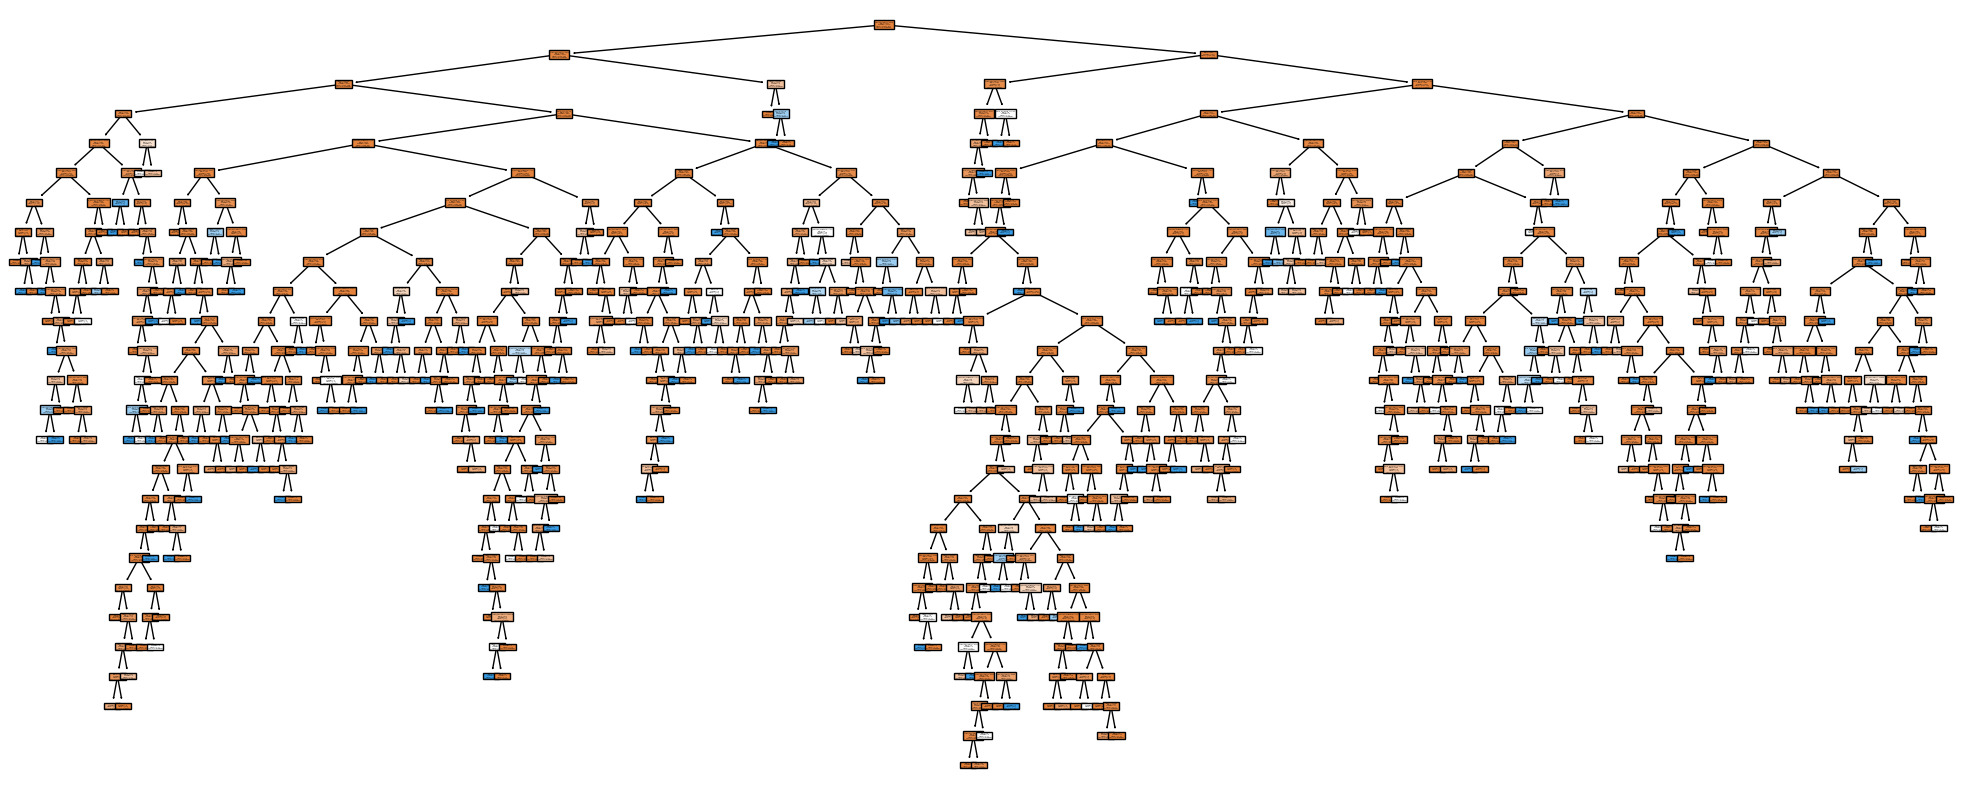

In [55]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Bom Pagador', 'Mau Pagador'],
          feature_names=list(X.columns))
plt.show()


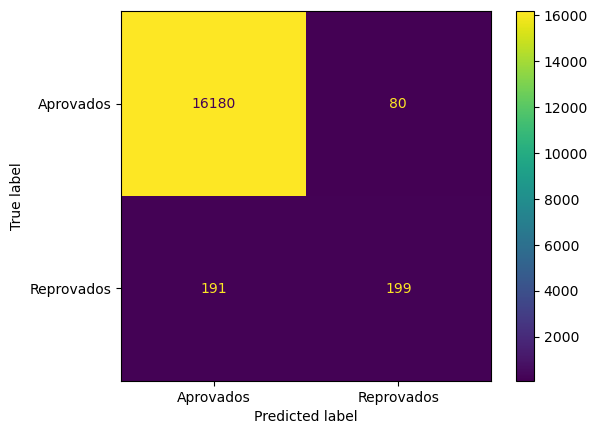

In [56]:
preditos = clf.predict(X)
cm = confusion_matrix(y, preditos, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [57]:
predict = clf.predict(X)
accuracy_score(y, predict)

0.9837237237237237

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

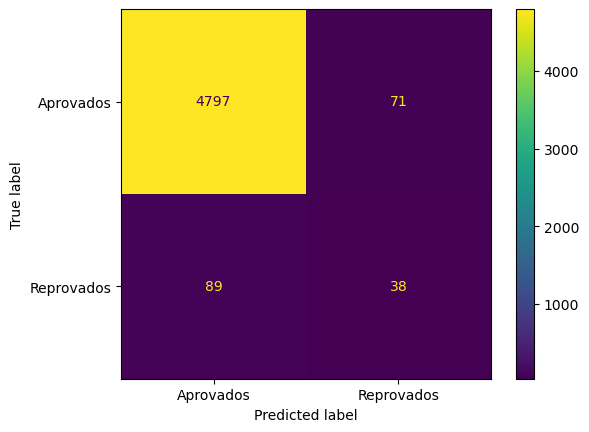

In [58]:
cm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [59]:
y_predict_test = clf.predict(X_test)
accuracy_score(y_test, y_predict_test)


0.9679679679679679

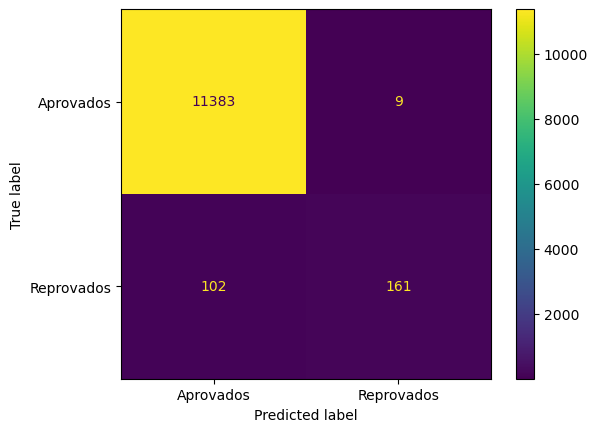

In [60]:
cm = confusion_matrix(y_train, clf.predict(X_train), labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Aprovados', 'Reprovados'])

MatrizDeConfusao.plot()

In [61]:
y_predict_train = clf.predict(X_train)
accuracy_score(y_train, y_predict_train)


0.9904761904761905

In [62]:
#4)
# tentando juntar maximo de folha e profundidade

clf2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf2.fit(X_train, y_train)
y_pred_2 = clf2.predict(X_test)


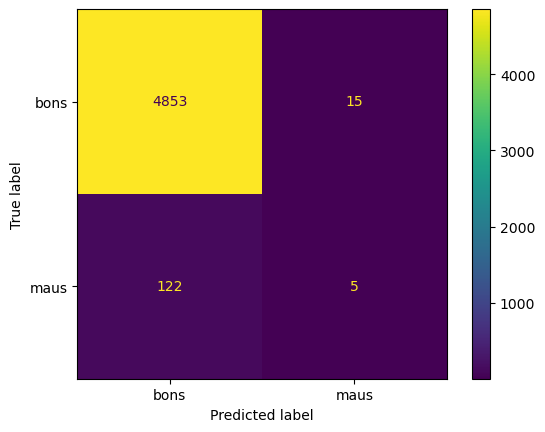

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_2, display_labels=['bons', 'maus']);


In [64]:
#Proporção dos maus no total
np.mean(y_pred_2)

0.004004004004004004

In [65]:
#5

y_pred_todos_bons = np.zeros_like(y_test, dtype=bool)
accuracy_score(y_test, y_pred_todos_bons)

0.9745745745745745